# Import Libraby

In [77]:
#importing basic module

import os
import pickle
import numpy as np

#importing Deep Learning Moduls

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model 
from tensorflow.keras.layers import Input,Dense, LSTM, Embedding, Dropout, add 
from tensorflow.keras.applications.vgg16 import preprocess_input

In [108]:
import sklearn
import pandas as pd
import tensorflow
from PIL import Image
import nltk
import tqdm

print("Numpy",np.__version__)
print("pandas",pd.__version__)
print("Sklearn",sklearn.__version__)
print("tensorflow",tensorflow.__version__)
print('Image',Image.__version__)
print('nltk',nltk.__version__)
print('tqdm',tqdm.__version__)


Numpy 1.26.2
pandas 2.1.4
Sklearn 1.2.2
tensorflow 2.18.0
Image 10.0.1
nltk 3.8.1
tqdm 4.65.0


In [79]:
# Load the VGG16 model with local weights and include the top layers
model = VGG16(weights='C:/Users/skv96/Downloads/vgg16_weights_tf_dim_ordering_tf_kernels.h5', include_top=True)

# Restructure the model to output from the second-to-last layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

# summary
print(model.summary())


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

None


In [80]:
from tqdm import tqdm

# Lets extract the features
features = {}
directory = os.path.join('C:/Users/skv96/Downloads/archive/ReducedImages')

for img_name in tqdm(os.listdir(directory)):
    #loading the image
    img_path = directory + '/' + img_name
    image = load_img(img_path, target_size=(224, 224))
    # converting image to array
    image = img_to_array(image)
    #reshape the image for model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    #preprocess the image for vgg
    image = preprocess_input(image)
    # lets extract the features from the image
    feature = model.predict(image, verbose=0)
    # geting Image id
    image_id = img_name.split('.')[0]
    # storing the features
    features[image_id] = feature

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]C:\Users\skv96\AppData\Roaming\Python\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_90']. Received: the structure of inputs=*
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:33<00:00,  1.07it/s]


In [81]:
import pickle

with open(r'C:\Users\skv96\Downloads\features.pkl', 'wb') as f:
    pickle.dump(features, f)

# Loading the captions data

In [82]:
with open (os.path.join('C:/Users/skv96/Downloads/archive/ReducedCaptions.txt'),'r') as f:
    next(f)
    captions_doc = f.read()

In [83]:
# leting mape the image to captions

mapping = {}

# processing
for line in tqdm(captions_doc.split('\n')):
    # spliting the line by comma(',')
    tokens = line.split(',')
    if len(line)<2:
        continue
    image_id,caption = tokens[0],tokens[1:]
    
    #removing extention from the image id
    image_id = image_id.split('.')[0]
    # converting list to string
    caption = " ".join(caption)
    # create list if needed
    if image_id not in mapping:
        mapping[image_id] = []
    # storing the caption
    mapping[image_id].append(caption)

100%|█████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 63696.76it/s]


In [84]:
#checking lenth of images
len(mapping)

100

In [85]:
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            # taking one caption at a time
            caption = captions[i]
            
            #preprocessing text data
            # converting lower case
            caption = caption.lower()
            # deleting digits,special chars, 
            caption = caption.replace('[^A-Za-z]','')
            # deleting additional spaces
            caption = caption.replace('\s+','')
            # adding start and end tags to the caption
            caption = '<start>' + " ".join([word for word in caption.split() if len(word)> 1]) + '<end>'
            captions[i] =caption

In [86]:
# preprocess the text

clean(mapping)

In [88]:
# checking the preprocess 

mapping['270724499_107481c88f']

['<start>dog with blue ball running in field<end>',
 '<start>small tan dog running on the grass with ball in his mouth<end>',
 '<start>dog running towards camera with ball in its mouth<end>',
 '<start>small dog running in the grass with toy in its mouth<end>',
 '<start>the dog is running with colorful ball<end>']

In [89]:
all_captions = []

for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [90]:
len(all_captions)

499

In [91]:
#checking first 10 captions
all_captions[:10]

['<start>man wearing sunglasses stands by table at cafe<end>',
 '<start>man about to pull out chair and sit down at restaurant<end>',
 '<start>man at eatery getting ready to sit down<end>',
 '<start>the large man grabs seat at restaurant<end>',
 '<start>girl and young boy are jumping on trampoline in suburban yard<end>',
 '<start>"a girl is jumping on trampoline with her arms in the air while boy in blue shirt is bouncing on his stomach ."<end>',
 '<start>teenager girl jumps high on trampoline and toddler falls on his stomach<end>',
 '<start>toddler and teenage girl jumping on trampoline<end>',
 '<start>two children jump on trampoline<end>',
 '<start>baby with pacifier saying love you in sign language<end>']

In [92]:
#  tokenize the text

tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index)+1 

In [93]:
with open(r'C:\Users\skv96\Downloads\tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

In [94]:
#checking vocab size

vocab_size

909

In [95]:
 # geting max lenth of caption available
    
max_len = max(len(caption.split())for caption in all_captions)
max_len

23

# train test Split

In [96]:
image_ids = list(mapping.keys())
split = int(len(image_ids)*0.90)
train = image_ids[:split]
test = image_ids[split:]

In [97]:
import random
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Creating data generator to get the data in batch
def data_generator(data_keys, mapping, features, tokenizer, max_len, vocab_size, batch_size, reduction_rate=0.9):
    """
    Generates batches of data for training.
    
    Parameters:
    - data_keys: List of keys representing image IDs.
    - mapping: Dictionary mapping image IDs to captions.
    - features: Dictionary mapping image IDs to feature vectors.
    - tokenizer: Tokenizer object for text-to-sequence conversion.
    - max_len: Maximum length of input sequences.
    - vocab_size: Size of the vocabulary.
    - batch_size: Number of samples per batch.
    - reduction_rate: Fraction of data to exclude (e.g., 0.9 for 90% reduction).
    """
    # Reduce the dataset by sampling 10% of data_keys
    num_samples = int(len(data_keys) * (1 - reduction_rate))
    reduced_data_keys = random.sample(data_keys, num_samples)
    
    print(f"Original dataset size: {len(data_keys)}")
    print(f"Reduced dataset size: {len(reduced_data_keys)}")
    
    # Loop over the reduced dataset
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in reduced_data_keys:
            n += 1
            captions = mapping[key]
            # Processing each caption
            for caption in captions:
                # Encode the sequence
                seq = tokenizer.texts_to_sequences([caption])[0]
                # Split the sequence into X, y pairs
                for i in range(1, len(seq)):
                    # Splitting into input and output pairs
                    in_seq, out_seq = seq[:i], seq[i]
                    # Padding the input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_len)[0]
                    # Encode the output sequence
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]

                    # Store the sequences
                    X1.append(features[key][0]) 
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield (X1, X2), y
                X1, X2, y = list(), list(), list()
                n = 0

# Model creation 

In [98]:
# image feature layers

inputs1 = Input(shape = (4096,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation = 'relu')(fe1)

# sequence feature layers
inputs2 = Input(shape = (max_len,))
se1 = Embedding(vocab_size, 256,mask_zero = True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

#Decoder model
decoder1 = add([fe2,se3])
decoder2 = Dense(256,activation = 'relu')(decoder1)
outputs = Dense(vocab_size, activation = 'softmax')(decoder2)

model = Model(inputs = [inputs1,inputs2], outputs = outputs)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

# plot the model

#plot_model(model,show_shapes = True)

In [99]:
# train the model

epochs = 10
batch_size = 16
steps = len(train)//batch_size

for i in range(epochs):
    generator = data_generator(train, mapping, features, tokenizer, max_len, vocab_size, batch_size)
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

Original dataset size: 90
Reduced dataset size: 8


C:\Users\skv96\AppData\Roaming\Python\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_113', 'keras_tensor_116']. Received: the structure of inputs=('*', '*')
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 879ms/step - loss: 6.3166
Original dataset size: 90
Reduced dataset size: 8
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 988ms/step - loss: 5.5345
Original dataset size: 90
Reduced dataset size: 8
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 805ms/step - loss: 5.6050
Original dataset size: 90
Reduced dataset size: 8
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 980ms/step - loss: 5.7764
Original dataset size: 90
Reduced dataset size: 8
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 932ms/step - loss: 5.3844
Original dataset size: 90
Reduced dataset size: 8
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 990ms/step - loss: 5.3271
Original dataset size: 90
Reduced dataset size: 8
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 825ms/step - loss: 5.2860
Original dataset size: 90
Reduced dataset size: 8
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 881ms/step - loss: 5.2588
Original dataset size: 90
Reduced dataset size: 8
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 941ms/step - loss: 5.0599
Original dataset size: 90
Reduced dataset size: 8
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 5.3251


In [100]:
    # saving the model
    model.save(r'C:\Users\skv96\Downloads\image_captioning_model.h5')

In [101]:
with open(r'C:\Users\skv96\Downloads\features.pkl', 'wb') as f:
    pickle.dump(features, f)

# Generate the caoption for the image

In [102]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index ==integer:
            return word
    return None

In [103]:
def predict_caption(model, image, tokenizer, max_len):
    # Initialize caption with the starting tag
    in_text = 'start'
    
    # Iterate over the max length of the sequence
    for i in range(max_len):
        # Convert text to sequence of word indexes
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # Pad the sequence
        sequence = pad_sequences([sequence], maxlen=max_len)
        # Predict the next word in the sequence
        yhat = model.predict([image, sequence], verbose=0)
        # Get the word index with the highest probability
        yhat = np.argmax(yhat)
        # Convert index to word
        word = idx_to_word(yhat, tokenizer)
        
        # Stop if the word is None (not found)
        if word is None:
            break
        
        # Append word to the input text if it's not the end token
        in_text += ' ' + word
        # Stop if the end tag is generated
        if word == 'end':
            break
    
    return in_text


In [104]:
from nltk.translate.bleu_score import corpus_bleu

# validate with test data

actual,predicted = list(),list()

for key in tqdm(test):
    # get actual caption
    captions = mapping [key]
    # predict the caption
    y_pred = predict_caption(model,features[key],tokenizer,max_len)
    
    # split into word
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    
    # append the list
    actual.append(actual_captions)
    predicted.append(y_pred)
    
# Calculate BLEU score

print("BLEU-1 %f" % corpus_bleu(actual,predicted, weights = (1.0,0,0,0)))
print("BLEU-2 %f" % corpus_bleu(actual,predicted, weights = (0.5,0.5,0,0)))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:11<00:00,  1.11s/it]

BLEU-1 0.171356
BLEU-2 0.000000



C:\ProgramData\anaconda3\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\ProgramData\anaconda3\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\ProgramData\anaconda3\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warni

In [105]:
from PIL import Image
import matplotlib.pyplot as plt

def generate_caption(image_name):
    #image_name = "95734035_84732a92c1.jpg"
    image_id = image_name.split('.')[0]
    image_path = "C:\\Users\\skv96\\Downloads\\archive\\Images\\" + image_name
    image = Image.open(image_path)
    captions = mapping[image_id]
    print('-'*15+'Actual'+'-'*15)
    for caption in captions:
        print(caption)
    #predicting the caption    
    y_pred = predict_caption(model, features[image_id],tokenizer,max_len)
    print('-'*15+'Predicted'+'-'*15)
    print(y_pred)
    plt.imshow(image)

---------------Actual---------------
<start>dog with blue ball running in field<end>
<start>small tan dog running on the grass with ball in his mouth<end>
<start>dog running towards camera with ball in its mouth<end>
<start>small dog running in the grass with toy in its mouth<end>
<start>the dog is running with colorful ball<end>
---------------Predicted---------------
start dog dog with grass grass end


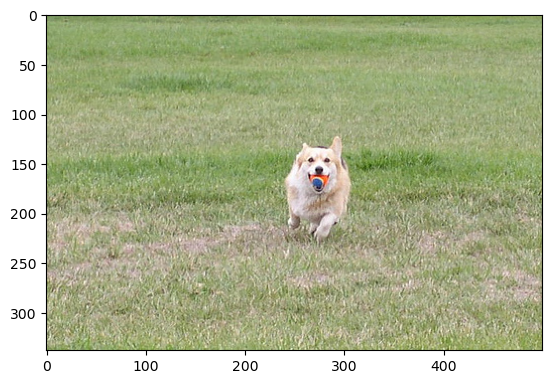

In [107]:
generate_caption('270724499_107481c88f.jpg')

In [151]:
y_pred

['<start>']